In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("coindata.xlsx")

In [4]:
df.head()

,limit weight,adjustment speed,slowing down length,real weight,visibility,normality
0,100,1.01,13,108,26.05,정상
1,100,50.00,100,1781,50.34,불량
2,100,50.00,100,1808,48.80,불량
3,200,1.01,13,254,35.85,정상
4,300,1.01,9,344,36.05,정상


In [5]:
df.tail()

,limit weight,adjustment speed,slowing down length,real weight,visibility,normality
34,1000,10.00,200,1267,39.63,정상
35,1000,20.00,13,1337,42.17,정상
36,1000,1.31,13,1018,45.90,정상
37,1000,1.01,13,1062,47.67,정상
38,1000,50.00,200,1783,52.72,불량


In [6]:
df1 = df.drop(['normality'],1)

C:\Users\tivwn\AppData\Local\Temp/ipykernel_6912/1320963642.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1 = df.drop(['normality'],1)


In [7]:
df1.head()

,limit weight,adjustment speed,slowing down length,real weight,visibility
0,100,1.01,13,108,26.05
1,100,50.00,100,1781,50.34
2,100,50.00,100,1808,48.80
3,200,1.01,13,254,35.85
4,300,1.01,9,344,36.05


In [8]:
df1.tail()

,limit weight,adjustment speed,slowing down length,real weight,visibility
34,1000,10.00,200,1267,39.63
35,1000,20.00,13,1337,42.17
36,1000,1.31,13,1018,45.90
37,1000,1.01,13,1062,47.67
38,1000,50.00,200,1783,52.72


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   limit weight         39 non-null     int64  
 1   adjustment speed     39 non-null     float64
 2   slowing down length  39 non-null     int64  
 3   real weight          39 non-null     int64  
 4   visibility           39 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.6 KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

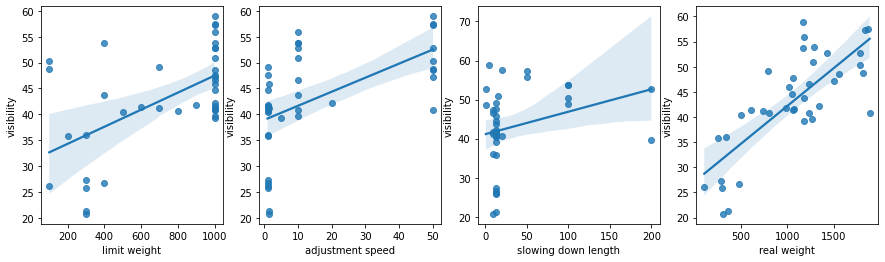

In [11]:
fig,axs = plt.subplots(figsize = (15,4), ncols = 4)
lm_features = ['limit weight','adjustment speed','slowing down length', 'real weight']

for i, feature in enumerate(lm_features):
    col = int(i%4)
    sns.regplot(x=feature, y = 'visibility', data = df1, ax = axs[col])

In [12]:
print(df1.mean())
print('*****')
print(df1.var())

limit weight            728.205128
adjustment speed         15.020256
slowing down length      32.435897
real weight            1053.384615
visibility               42.996923
dtype: float64
*****
limit weight           114709.851552
adjustment speed          396.041524
slowing down length      2335.673414
real weight            258942.821862
visibility                 99.189206
dtype: float64


# modeling

In [13]:
x = df1.drop(['visibility'],1)
y = df1['visibility']

C:\Users\tivwn\AppData\Local\Temp/ipykernel_6912/513702552.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df1.drop(['visibility'],1)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [16]:
LR = LinearRegression()
model = LR.fit(X_train,y_train)

In [17]:
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('mse:',mse, 'rmse:',rmse)
print('R2 score: {0:.3f}'.format(r2_score(y_test, pred)))

mse: 23.997925493928566 rmse: 4.898767752601522
R2 score: 0.824


In [18]:
print(model.intercept_)
coeff = pd.Series(model.coef_, index = x.columns)
coeff.sort_values(ascending = False)

27.140819953942362


adjustment speed       0.031037
real weight            0.010980
slowing down length    0.007722
limit weight           0.004918
dtype: float64

# 잔차분석

In [19]:
from scipy import stats

((array([-1.38519806, -0.83757156, -0.46579419, -0.15039337,  0.15039337,
          0.46579419,  0.83757156,  1.38519806]),
  array([-6.21898767, -4.65212873, -2.90018321, -2.01218358,  0.62733587,
          0.85564134,  3.8187824 , 10.17332678])),
 (5.585545462092788, -0.03854959870061072, 0.9641314809036158))

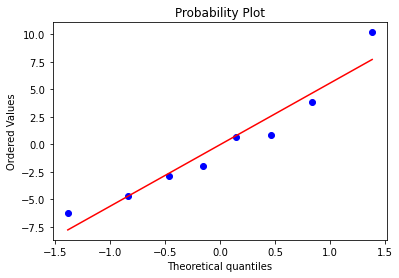

In [20]:
res = y_test - pred
stats.probplot(res, plot = plt)

In [21]:
stats.shapiro(res)

ShapiroResult(statistic=0.935974657535553, pvalue=0.5719590187072754)

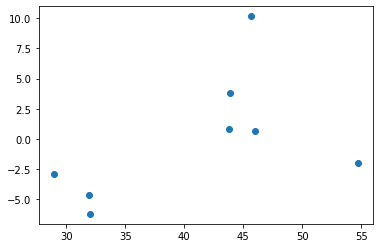

In [22]:
plt.scatter(pred, res)

C:\Users\tivwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='visibility'>

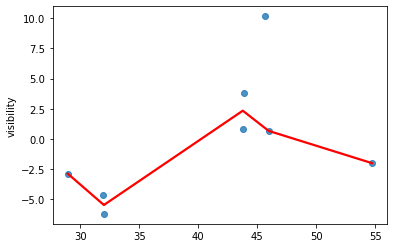

In [23]:
sns.regplot(pred, res, lowess = True, line_kws = {'color':'red'})

# systematization

In [24]:
import pickle
import joblib

In [25]:
joblib.dump(model, './press_coin2.pkl')

['./press coin2.pkl']

In [26]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [28]:
def make_path(file_name):
    path = ''
    join = '{}/{}.png'.format(path,file_name)
    return join

In [29]:
from PIL import Image

In [28]:
def simul_coin_press():
    model1 = joblib.load('press_coin2.pkl')
    
    df = pd.read_excel("coindata.xlsx")
    visi = df['visibility'].values
    
    print('제한하중을 입력하세요:')
    limit_w = float(input())
    print('조정속도를 입력하세요:')
    adj_speed = float(input())
    print('감속거리를 입력하세요:')
    sd_length = float(input())
    print('실제하중을 입력하세요:')
    real_w = float(input())
    
    test_data = pd.DataFrame([[limit_w],[adj_speed],[sd_length],[real_w]]).T
    
    visibility = model1.predict(test_data)
    
    file_name = str(find_nearest(visi,visibility))
    
    path = make_path(file_name)

    print('예상 선명도:',visibility)
    img = Image.open(path)
    image = np.array(img)
    
    plt.imshow(image)
    plt.show()

In [ ]:
simul_coin_press